# Hospital Patient Data – Exploratory Data Analysis (EDA)

## Objective
The objective of this analysis is to explore hospital patient data to identify:
- Patient demographics
- Admission patterns
- Disease distribution
- Length of stay trends
- Treatment cost behavior
- Patient outcomes

The insights from this analysis can help hospitals improve
operational efficiency and patient care.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
import os

BASE_DIR = os.path.dirname(os.getcwd())
DATA_PATH = os.path.join(BASE_DIR, "data", "processed", "hospital_patient_cleaned.csv")

df = pd.read_csv(DATA_PATH)

df.head()


,admission_id,patient_id,admission_date,discharge_date,department,admission_type,length_of_stay,name,age,gender,...,diagnosis_id,disease,severity,treatment_id,doctor_name,treatment_type,treatment_cost,outcome_id,outcome,follow_up_required
0,A00001,P00001,2025-05-08,2025-05-26,Gynecology,Emergency,18,Hamsini Kadakia,82,Male,...,D00001,Ovarian Cyst,Critical,T00001,Aishani Wagle,ICU Care,389431,O00001,Recovered,Yes
1,A00002,P00002,2025-06-22,2025-07-08,Orthopedics,Emergency,16,Advaith Ratta,36,Male,...,D00002,Fracture,Mild,T00002,Rayaan Bobal,Surgery,245033,O00002,Recovered,Yes
2,A00003,P00003,2025-10-09,2025-10-10,Cardiology,Emergency,1,Faras Date,14,Male,...,D00003,Heart Attack,Critical,T00003,Darika Brahmbhatt,Surgery,350547,O00003,Recovered,No
3,A00004,P00004,2025-12-11,2025-12-15,General Medicine,Planned,4,Ekanta Tata,4,Male,...,D00004,Diabetes,Moderate,T00004,Timothy Bava,Medication,371226,O00004,Recovered,No
4,A00005,P00005,2025-06-14,2025-06-19,Cardiology,Emergency,5,Samesh Boase,65,Male,...,D00005,Hypertension,Moderate,T00005,Agastya Sandhu,ICU Care,55087,O00005,Recovered,Yes


In [3]:
df.shape

(1000, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   admission_id        1000 non-null   object
 1   patient_id          1000 non-null   object
 2   admission_date      1000 non-null   object
 3   discharge_date      1000 non-null   object
 4   department          1000 non-null   object
 5   admission_type      1000 non-null   object
 6   length_of_stay      1000 non-null   int64 
 7   name                1000 non-null   object
 8   age                 1000 non-null   int64 
 9   gender              1000 non-null   object
 10  blood_group         1000 non-null   object
 11  city                1000 non-null   object
 12  diagnosis_id        1000 non-null   object
 13  disease             1000 non-null   object
 14  severity            1000 non-null   object
 15  treatment_id        1000 non-null   object
 16  doctor_name         1000 

In [5]:
df.describe()

,length_of_stay,age,treatment_cost
count,1000.00000,1000.000000,1000.000000
mean,10.73300,45.671000,201680.750000
std,5.73922,25.694064,116508.671237
min,1.00000,1.000000,5280.000000
25%,6.00000,23.000000,99098.750000
50%,11.00000,46.000000,198218.000000
75%,16.00000,68.000000,307016.250000
max,20.00000,90.000000,399824.000000


In [6]:
df.isnull().sum()

admission_id          0
patient_id            0
admission_date        0
discharge_date        0
department            0
admission_type        0
length_of_stay        0
name                  0
age                   0
gender                0
blood_group           0
city                  0
diagnosis_id          0
disease               0
severity              0
treatment_id          0
doctor_name           0
treatment_type        0
treatment_cost        0
outcome_id            0
outcome               0
follow_up_required    0
dtype: int64

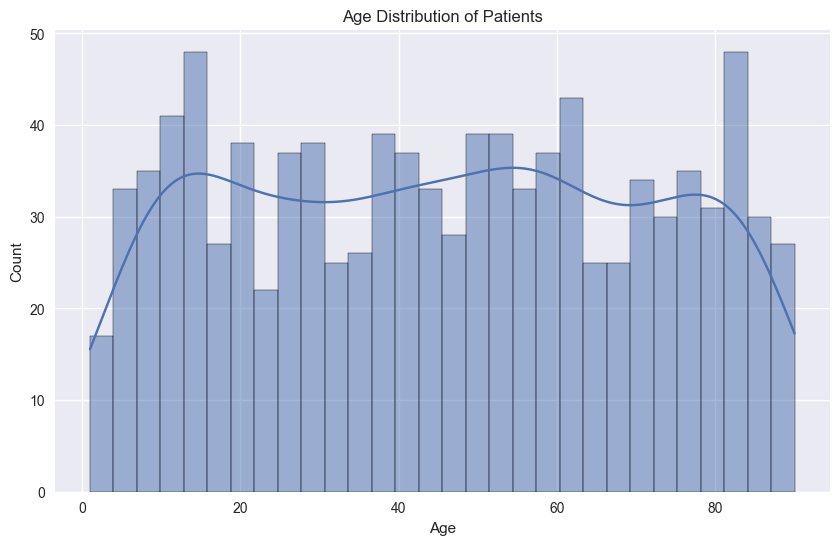

In [7]:
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


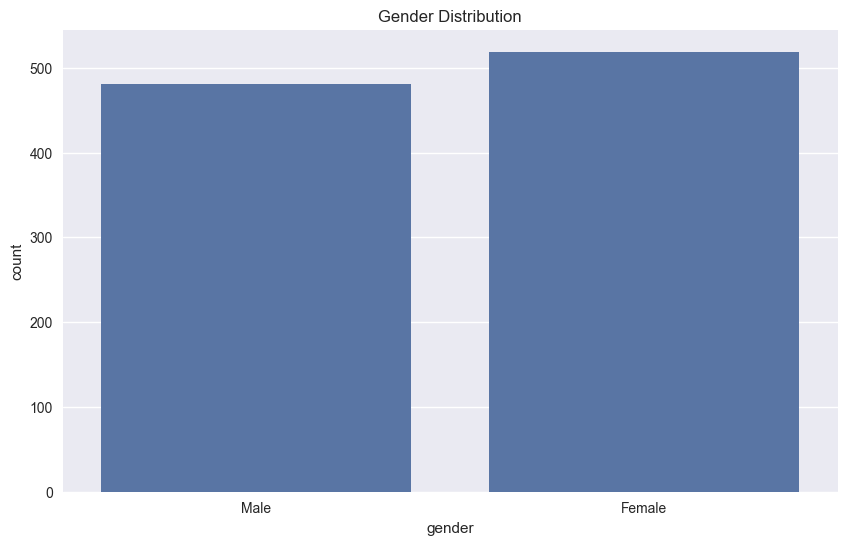

In [8]:
sns.countplot(x="gender", data=df)
plt.title("Gender Distribution")
plt.show()


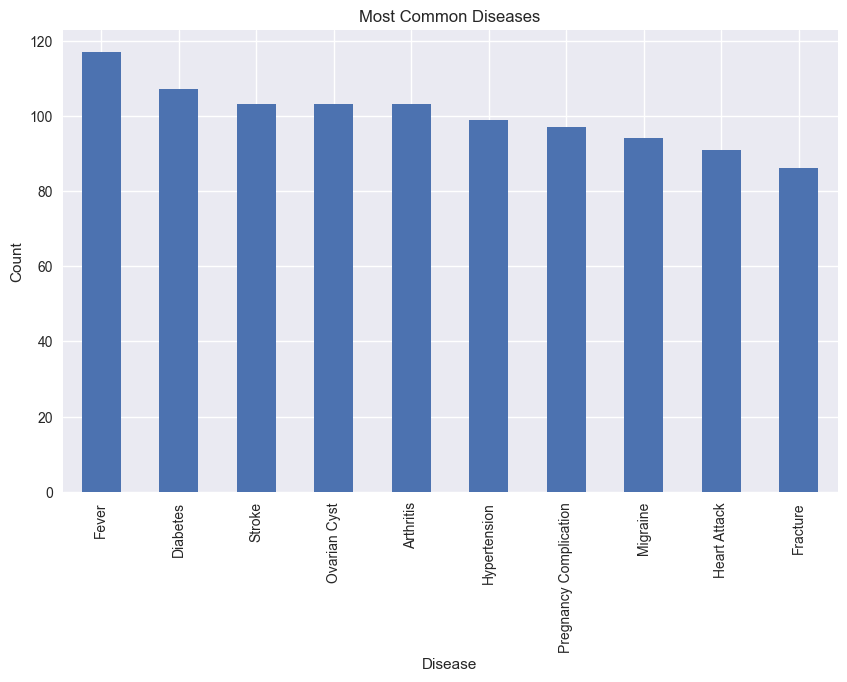

In [9]:
df["disease"].value_counts().head(10).plot(kind="bar")
plt.title("Most Common Diseases")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.show()


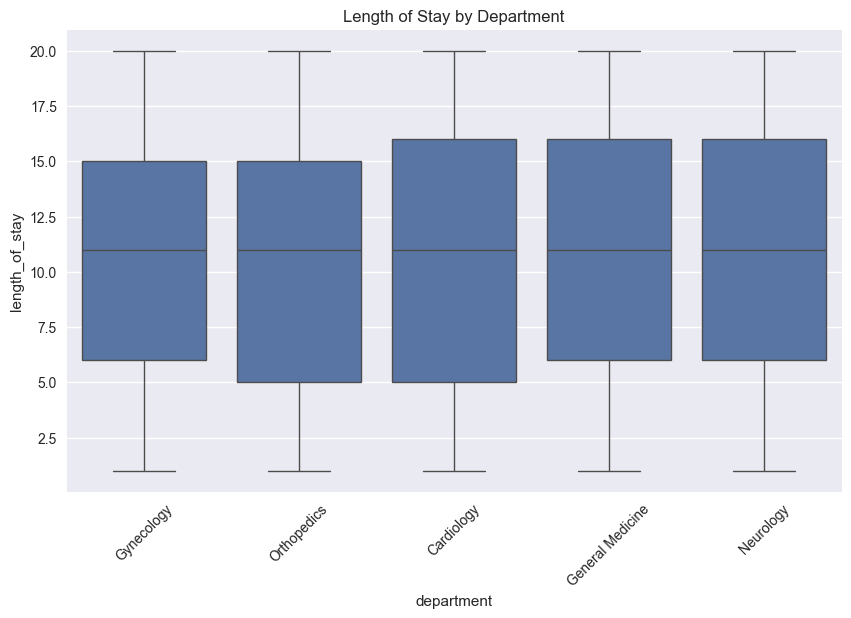

In [10]:
sns.boxplot(x="department", y="length_of_stay", data=df)
plt.xticks(rotation=45)
plt.title("Length of Stay by Department")
plt.show()


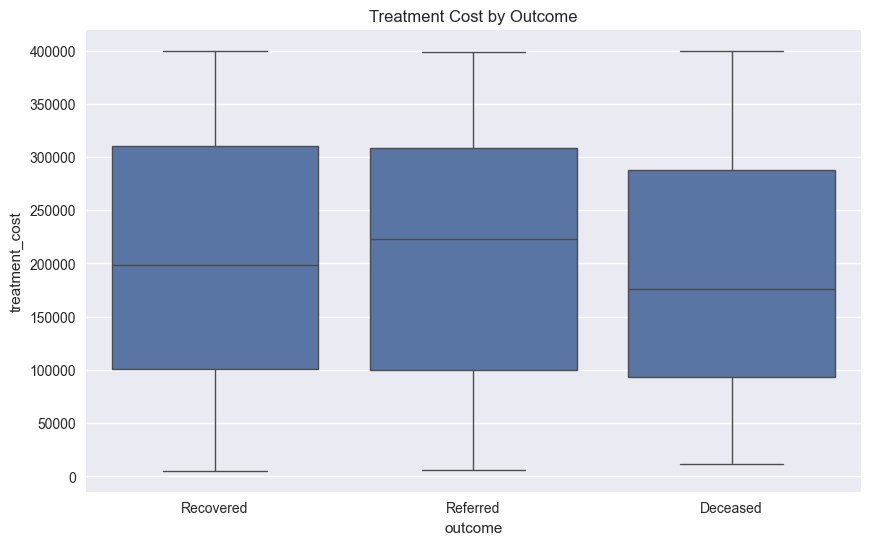

In [11]:
sns.boxplot(x="outcome", y="treatment_cost", data=df)
plt.title("Treatment Cost by Outcome")
plt.show()


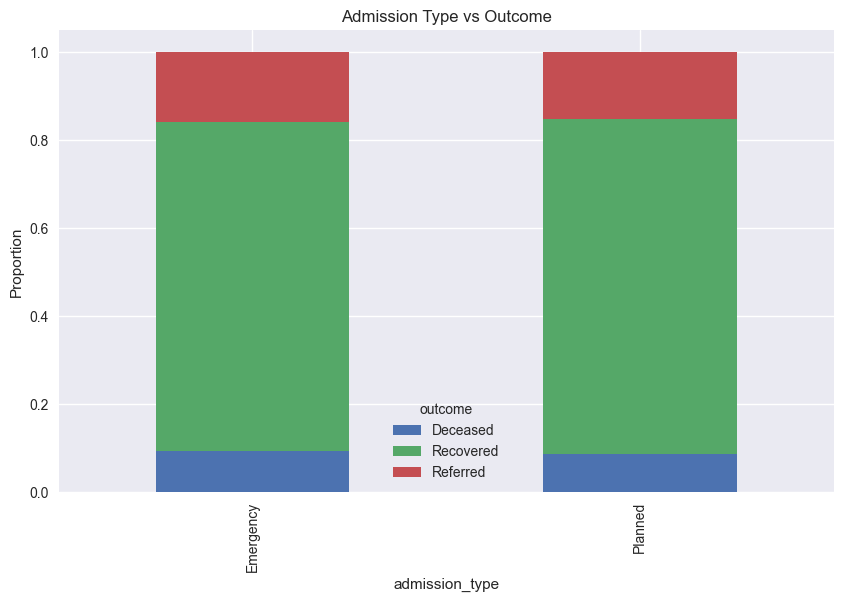

In [12]:
pd.crosstab(df["admission_type"], df["outcome"], normalize="index") \
    .plot(kind="bar", stacked=True)

plt.title("Admission Type vs Outcome")
plt.ylabel("Proportion")
plt.show()


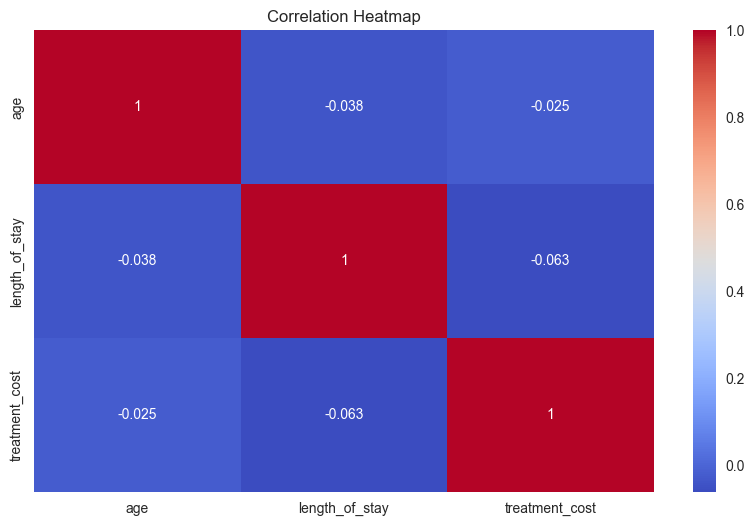

In [13]:
numeric_cols = ["age", "length_of_stay", "treatment_cost"]

sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Key Insights

- Majority of patients fall in the adult and senior age groups.
- Emergency admissions show a higher proportion of critical outcomes.
- Cardiology and Neurology departments have longer average hospital stays.
- Treatment costs are significantly higher for ICU and surgery cases.
- Length of stay shows moderate correlation with treatment cost.


## Conclusion

This EDA highlights important trends in hospital operations, patient demographics,
and treatment outcomes. These insights can be used to:
- Improve hospital resource planning
- Identify high-cost departments
- Enhance patient care strategies
- Support data-driven decision-making
